# 数据分析基础篇 - 数据探索

<br>


## 目录

* [1. 数据质量分析](#1.-数据质量分析)
 * [1.1 数据集中的脏数据](#1.1-数据集中的脏数据)
 * [1.2 数据集中的异常值分析](#1.2-数据集中的异常值分析)
 * [1.3 数据集的数据特征分析](#1.3-数据集的数据特征分析)
   * [1.3.1 分布分析 - 定量数据](#1.3.1-分布分析---定量数据)
   * [1.3.2 分布分析 - 定性数据](#1.3.2-分布分析---定性数据)
   * [1.3.3 对比分析](#1.3.3-对比分析)
   * [1.3.4 统计量分析](#1.3.4-统计量分析)
   * [1.3.5 周期性分析](#1.3.5-周期性分析)
   * [1.3.6 贡献度分析](#1.3.6-贡献度分析)
   * [1.3.7 相关性分析](#1.3.7-相关性分析)

In [1]:
# 先导入我们需要用到的相关数据集
import pandas as pd
import sys
import matplotlib.pyplot as plt
import scipy
import numpy as np
import time
import datetime
try:
    data_file = pd.read_csv("../../issue_Documents/data/test_data/loans.csv")
except FileNotFoundError:
    data_file = pd.read_csv("../issue_Documents/data/test_data/loans.csv")
data_file

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2.0,0.0,0.0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5.0,0.0,0.0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8.0,0.0,0.0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5.0,0.0,0.0,1


In [2]:
# 在前边我们已经明确了相关列名的含义
data_description = {'是否符合信用承保标准': 'credit_policy',
 '贷款的目的': 'purpose',
 '贷款的利率': 'int_rate',
 '每月付款': 'installment',
 '年收入的自然对数': 'log_annual_inc',
 '借款人的债务收入比': 'dti',
 '借款人的 FICO 信用评分': 'fico',
 '借款人拥有信用额度的天数': 'days_with_cr_line',
 '借款人的循环余额': 'revol_bal',
 '借款人的循环线利用率': 'revol_util',
 '借款人最近6个月的债权人查询次数': 'inq_last_6mths',
 '借款人在过去 2 年内逾期 30 天以上的付款次数': 'delinq_2yrs',
 '借款人的贬义公共记录数量': 'pub_rec',
 '款是否未全额偿还': 'not_fully_paid'}
data_description

{'是否符合信用承保标准': 'credit_policy',
 '贷款的目的': 'purpose',
 '贷款的利率': 'int_rate',
 '每月付款': 'installment',
 '年收入的自然对数': 'log_annual_inc',
 '借款人的债务收入比': 'dti',
 '借款人的 FICO 信用评分': 'fico',
 '借款人拥有信用额度的天数': 'days_with_cr_line',
 '借款人的循环余额': 'revol_bal',
 '借款人的循环线利用率': 'revol_util',
 '借款人最近6个月的债权人查询次数': 'inq_last_6mths',
 '借款人在过去 2 年内逾期 30 天以上的付款次数': 'delinq_2yrs',
 '借款人的贬义公共记录数量': 'pub_rec',
 '款是否未全额偿还': 'not_fully_paid'}

> 可能目前对相关的库不是很熟悉，或者根本不了解，但是看永远是看不会的，带着问题去解决问题永远比去看要快很多；<br>
> Ganbare!

## 1. 数据质量分析

在我们进行数据的取样之后，在建模之前我们必须要进行考虑的问题是，我们取样的相关数据能不能满足我们需要构建密性的需求；

数据质量分析的相关指标：

+ 数据状态是否满足我们建模的需要？
+ 数据中一般的规律是什么？
+ 数据不同因素之间的规律是什么？

检验数据质量的相关手段：

+ 缺失值、异常值和相关一致性进行分析，来甄别脏数据；
+ 绘制相关的图表来展现相关特征；
+ 计算相关特征量；

### 1.1 数据集中的脏数据

数据质量分析就是检查数据中是否存在脏数据， 脏数据就是指不符合要求不能直接进行分析的相关数值，比较常见的空数据类型：空数值、特殊符号、异常值;

#### 缺失值

缺失值指的是在数据记录的过程中缺失的相关数据，在实际情况下有下边的几种情况：

+ 无法获取相关数据、获取信息的代价太大；
+ 遗漏信息，相关技术问题导致在获取数值的途径出现问题，或者是数据文件的问题；
+ 相关属性不存在，一些特殊的属性数据无法被获取

**影响**：

+ 缺失数值会导致丢失大量有用的信息；
+ 对于建模的相关影响表现出不确定性，模型中的规律更难去发现；
+ 包含空值会在默写数学模型上出现混乱；

**衡量缺失值的相关方法**：

+ 统计分析数值，获得相关缺失值的指标：缺失值的个数、缺失值的缺失率；

**缺失值处理的相关方法**：

+ 拉格朗日插值法
+ 牛顿插值法
+ 不处理


In [3]:
# 在这里我们必须分析一下目前我们手上的数据集的相关缺失值情况
# 因为涉及到了相关缺失值的处理方法，在这里先简单进行分析相关的数据特征
# pandas 提供了基本的数据分析指标 
data_file.describe(include="all")

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578,9578.000000,9578.000000,9574.000000,9578.000000,9578.000000,9549.000000,9.578000e+03,9516.000000,9549.000000,9549.000000,9549.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.931874,12.606679,710.846314,4562.026085,1.691396e+04,46.865677,1.571578,0.163787,0.062101,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614736,6.883970,37.970537,2497.985733,3.375619e+04,29.018642,2.198095,0.546712,0.262152,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.927987,12.665000,707.000000,4139.958333,8.596000e+03,46.400000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.289832,17.950000,737.000000,5730.000000,1.824950e+04,71.000000,2.000000,0.000000,0.000000,0.000000


**练习**
$\textsf{TODO - 1.1:}$
+ 请查阅相关资料，解释上方表格的相关参数含义： count / unique...等参数的含义

**练习 1.1 作答区域**
<br>
<br>
<br>
<br>

In [4]:
# 我们需要知道是否存在缺失值，最重要的是找出所有不同的值
# pandas 提供了 Unique 的 函数 来打印不同的类：
# 参考的API文档：https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html
data_file["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

关于 Pandas 的数据筛选相关使用方法：

+ [Pandas 使用表达式筛选相关数据](https://www.gairuo.com/p/pandas-selecting-data)

In [5]:
# 可以使用 isnull 函数来打印出空值的行
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html
data_file["revol_util"][data_file["revol_util"].isnull().values==True]

781    NaN
803    NaN
839    NaN
857    NaN
1213   NaN
        ..
8570   NaN
8676   NaN
8759   NaN
9073   NaN
9364   NaN
Name: revol_util, Length: 62, dtype: float64

In [6]:
# 一定要注意 Pandas 的相关数据类型 - DataFrame 还是 Series 才能选对对应的函数
type(data_file["revol_util"][data_file["revol_util"].isnull().values==True])

pandas.core.series.Series

In [7]:
# 如果需要统计对应的信息，sum 函数可以帮助你完成对应的需求，上边的代码可以改成：
print(" revol_util 列对应的空值个数是：%d" %(data_file[data_file["revol_util"].isnull().values==True]["revol_util"].size))

 revol_util 列对应的空值个数是：62


In [8]:
# 获取所有的列名
data_file.columns.to_list()

['credit_policy',
 'purpose',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'not_fully_paid']

---
**练习**
$\textsf{TODO - 1.2:}$

+ 从上边的的相关操作，我们知道了如何查找 Pandas 空值行的方法，现在请你编写代码来获取所有列空值的个数，并打印出来
---

In [9]:
# 练习 TODO - 1.2 




<br>

### 1.2 数据集中的异常值分析

在数据分析中，因为可能会存在：

+ 录入数据出现错误、存在不合常理的数据等异常情况；

忽视出现的异常数值会导致建模过程中模型的准确度，会对最终结果产生较大的影响，因此必须发现数据集当中的异常值；

异常值指的是： 样本中个别数值，其数值明显偏离其他值，异常值也被称为：离群点；异常值分析也被称为**离群点分析**；

#### 常见的分析方法

**1.简单统计量分析**

即对于一个数据集，存在最大值、最小值的相关情况，是一个描述统计，观察异常的最大值和最小值可以观察是否存在异常值情况；

<br>

**2.$3\sigma$ 原则**

如果数据服从正态分布，那么在$3\sigma$的原则下，即异常值得特征：某个数字偏离一组数据平均值的3倍标准差值，即可把这个视为异常值；

参考链接：

+ [一文搞懂“正态分布”所有需要的知识点](https://zhuanlan.zhihu.com/p/128809461)
+ [3σ定律（three-sigma rule）/ 68–95–99.7原则](https://blog.csdn.net/jiajiren11/article/details/90400595)

<br>

**3.箱形图**

什么是箱型图？

箱型图用于直观地反映数据的离散情况，不受相关离散值的影响，准确反映出数据的相关分布情况，同时也利于数据的相关清洗；

参考链接：

+ [箱型图介绍](https://niyanchun.com/box-plot-introduction.html)
+ [Matplotlib - 箱线图、箱型图 boxplot () 所有用法详解](https://blog.csdn.net/weixin_40683253/article/details/87857194)

<br>

怎么判断箱型图的特征：

参考链接：

+ [搞懂箱形图分析，快速识别异常值！](https://blog.csdn.net/clairliu/article/details/79217546)
+ [箱型图介绍](https://niyanchun.com/box-plot-introduction.html)


<br>
了解如何让 Matplotlib 支持 中文字符的相关显示：

+ [matplotlib图例中文乱码?](https://www.zhihu.com/question/25404709)

In [10]:
# 我们选取一列没有空值的列来演示一遍上边的
print("int_rate 列最大值是：")
print(data_file["int_rate"].max())
print("\n")
print("int_rate 列最小值是：")
print(data_file["int_rate"].min())
print("\n")
print("int_rate 列的离散值是：")
print(data_file["int_rate"].std())
print("\n")
print("int_rate 列的平均值是：")
print(data_file["int_rate"].mean())

int_rate 列最大值是：
0.2164


int_rate 列最小值是：
0.06


int_rate 列的离散值是：
0.026846987213382724


int_rate 列的平均值是：
0.12264006055543834


In [11]:
# 检查相关极限值 是否存在不符合 3σ 原则的了列数值，可以视为异常值
# 下边界
int_rateMean = data_file["int_rate"].mean()
int_rateStd = data_file["int_rate"].std()

print("存在不符合 mean - 3*σ 的列：")
data_file["int_rate"][(data_file["int_rate"] < (int_rateMean-3*int_rateStd))]

存在不符合 mean - 3*σ 的列：


Series([], Name: int_rate, dtype: float64)

---
**练习**
$\textsf{TODO - 1.3:}$
+ 请参考上边的代码，编写代码打印出不符合 $mean+3*\sigma$ 的列
+ 并打印相关的个数
---

In [12]:
# TODO - 1.3 的相关代码



In [13]:
# 检查 Jupyter Notebook 是否已经安装了 Matplotlib Numpy 等数据分析库如果没有安装下边的代码就会安装
import platform 
if platform.system().lower() == "windows":
    !pip install matplotlib numpy
else:
    !conda install --yes --prefix {sys.prefix} matplotlib numpy

Solving environment: done

# All requested packages already installed.



[0.1979, 0.1982, 0.2011, 0.2016, 0.2017, 0.2052, 0.2086, 0.209, 0.2121, 0.2164]


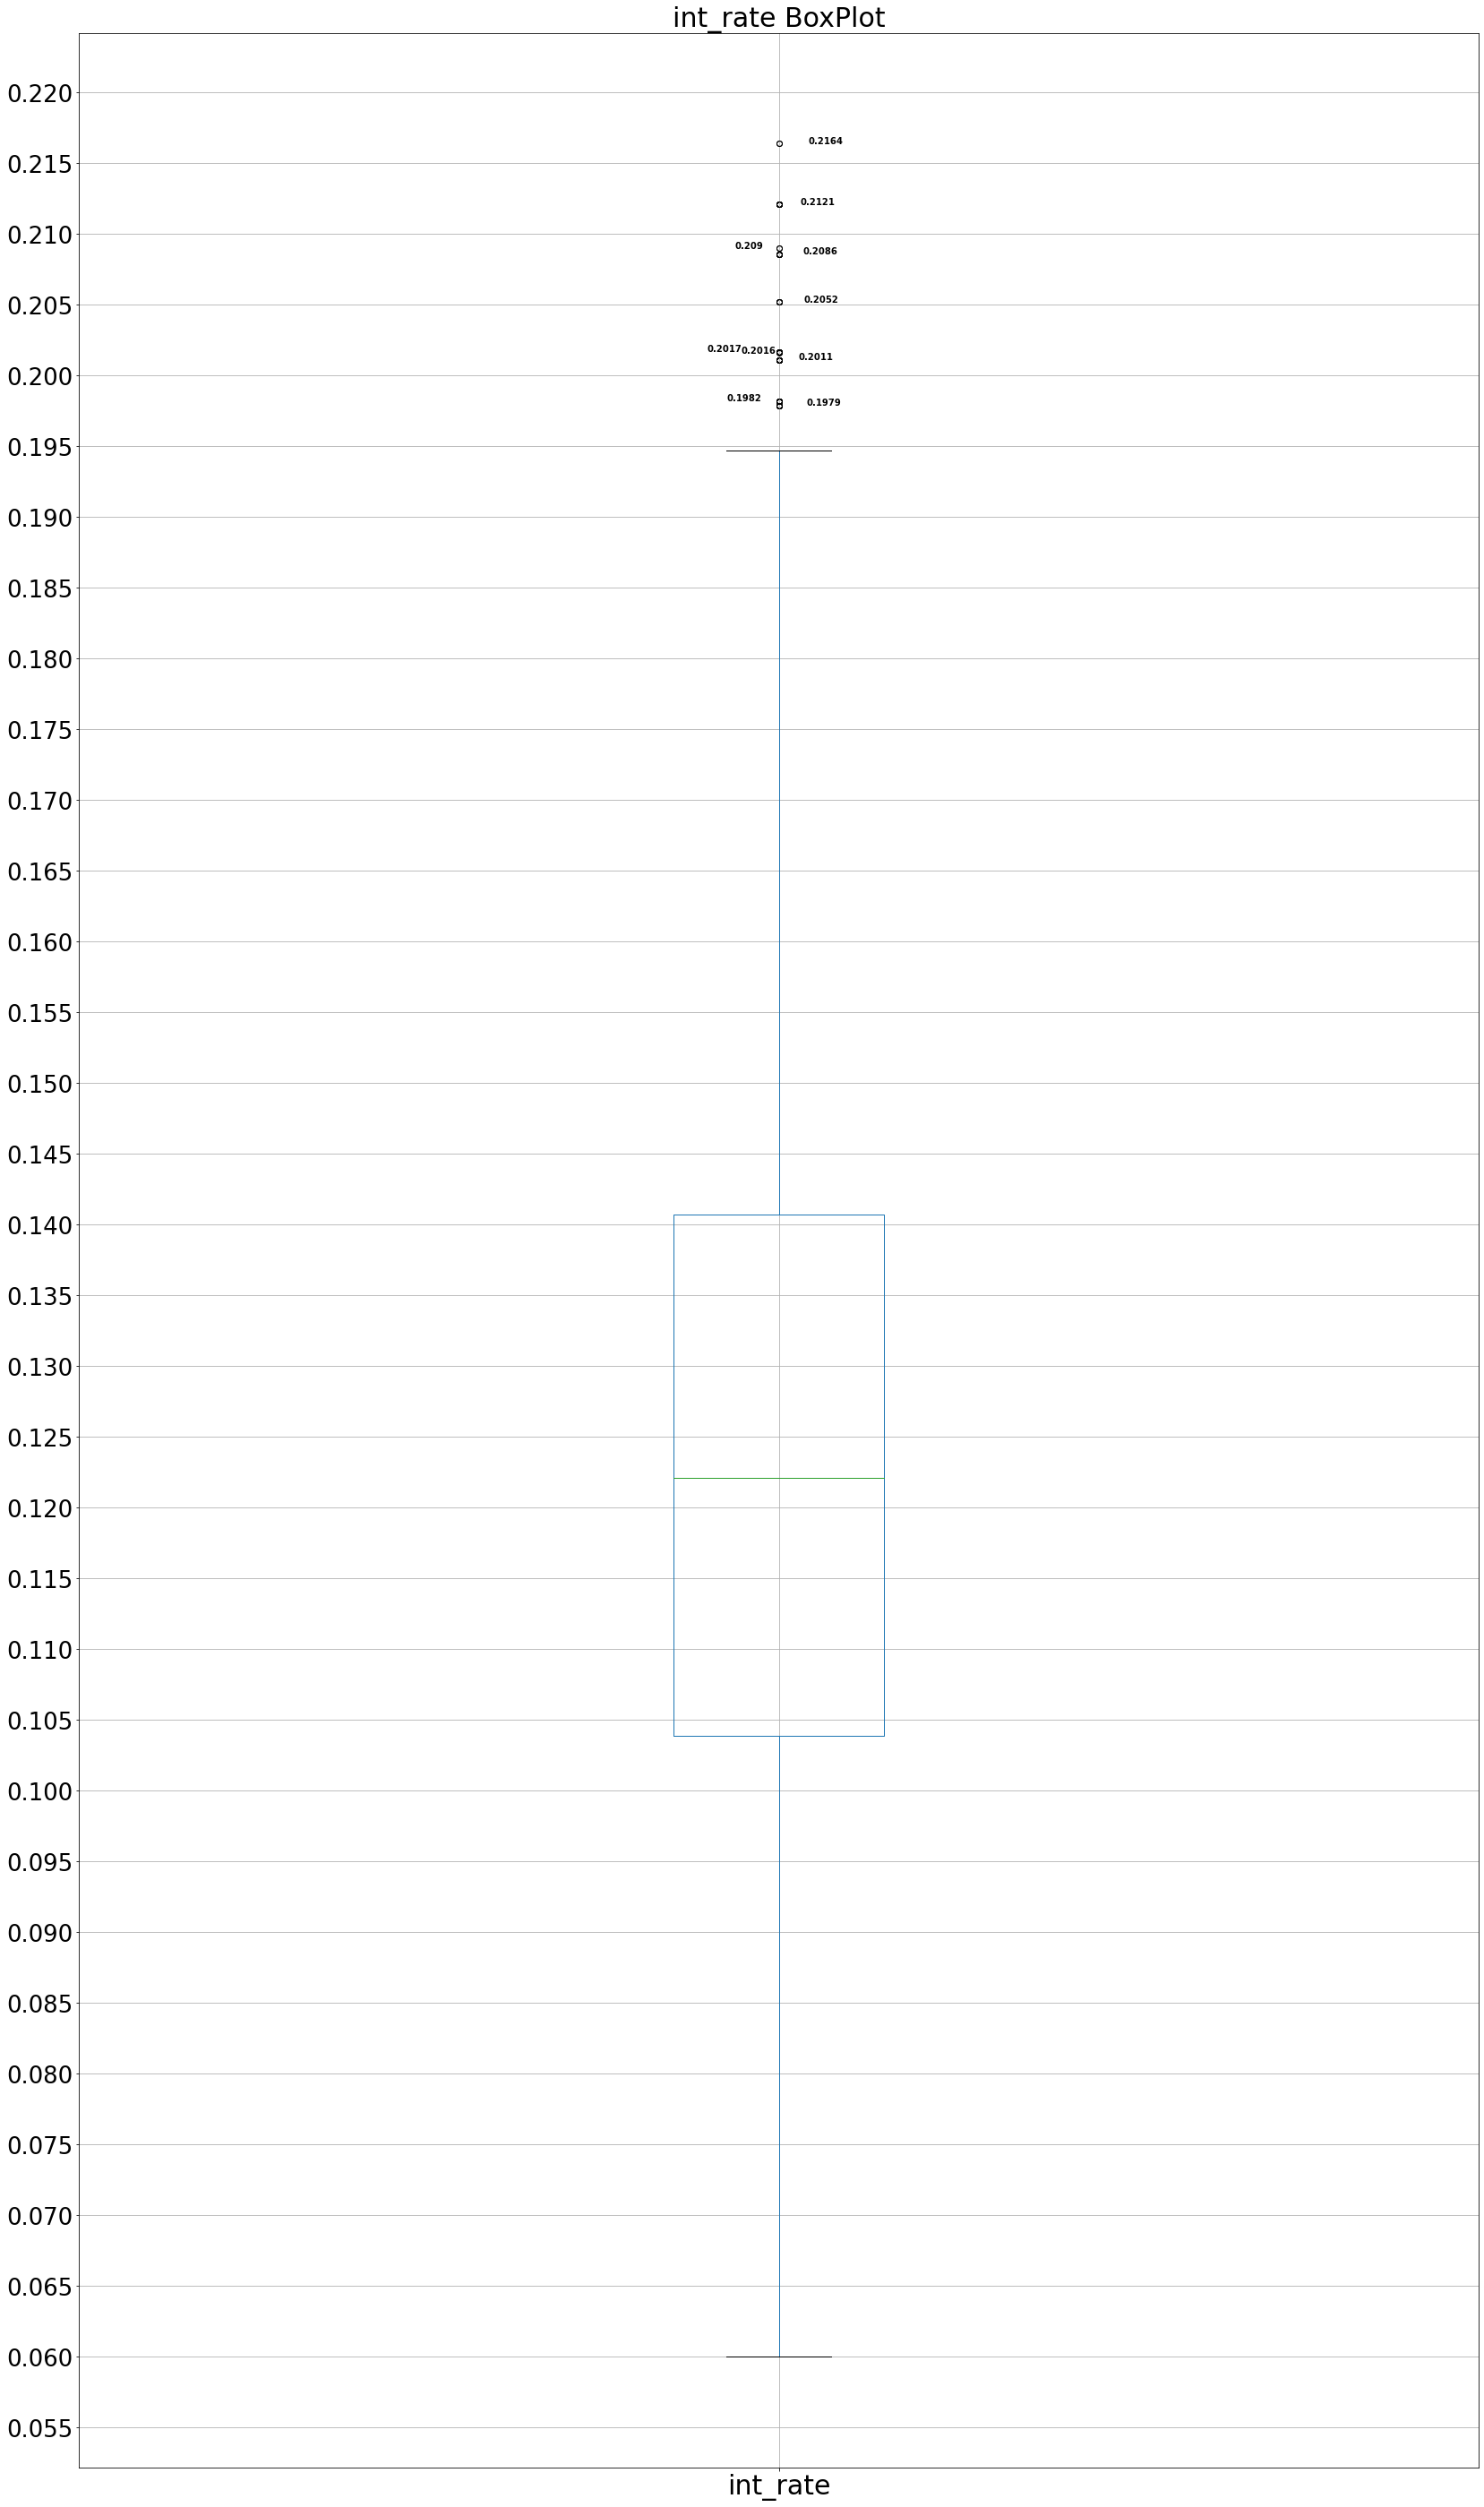

In [14]:
# 现在需要使用 Matplotlib 来画 箱型图
# 第一种绘图方式，使用 DataFrame 的 boxplot 函数来进行绘制
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["font.serif"] = ['SimHei']
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(28,50))
plt.title("int_rate BoxPlot", fontsize=30)
y_ticks = np.arange(0.05, 0.26, 0.005)
plt.xticks(fontsize=30)
plt.yticks(y_ticks, fontsize=26)

p = data_file["int_rate"].to_frame().boxplot(return_type="dict")
x_axis = p["fliers"][0].get_xdata()
y_axis = p["fliers"][0].get_ydata()
y_axis.sort()


y_unique = list()
for i in range(len(x_axis)):
    sid = np.random.uniform(0.0015, 0.015)
    # Create list
    if y_axis[i] in y_unique:
        pass
    else:
        y_unique.append(y_axis[i])
        if i>0:
            plt.annotate(y_axis[i], xy=(x_axis[i], y_axis[i]), xytext=(x_axis[i]+0.04-0.0001/(y_axis[i]-y_axis[i-1]+0.001), y_axis[i]), weight="black")
        else:
            plt.annotate(y_axis[i], xy=(x_axis[i], y_axis[i]), xytext=(x_axis[i]+0.02, y_axis[i]), weight="bold")

print(y_unique)

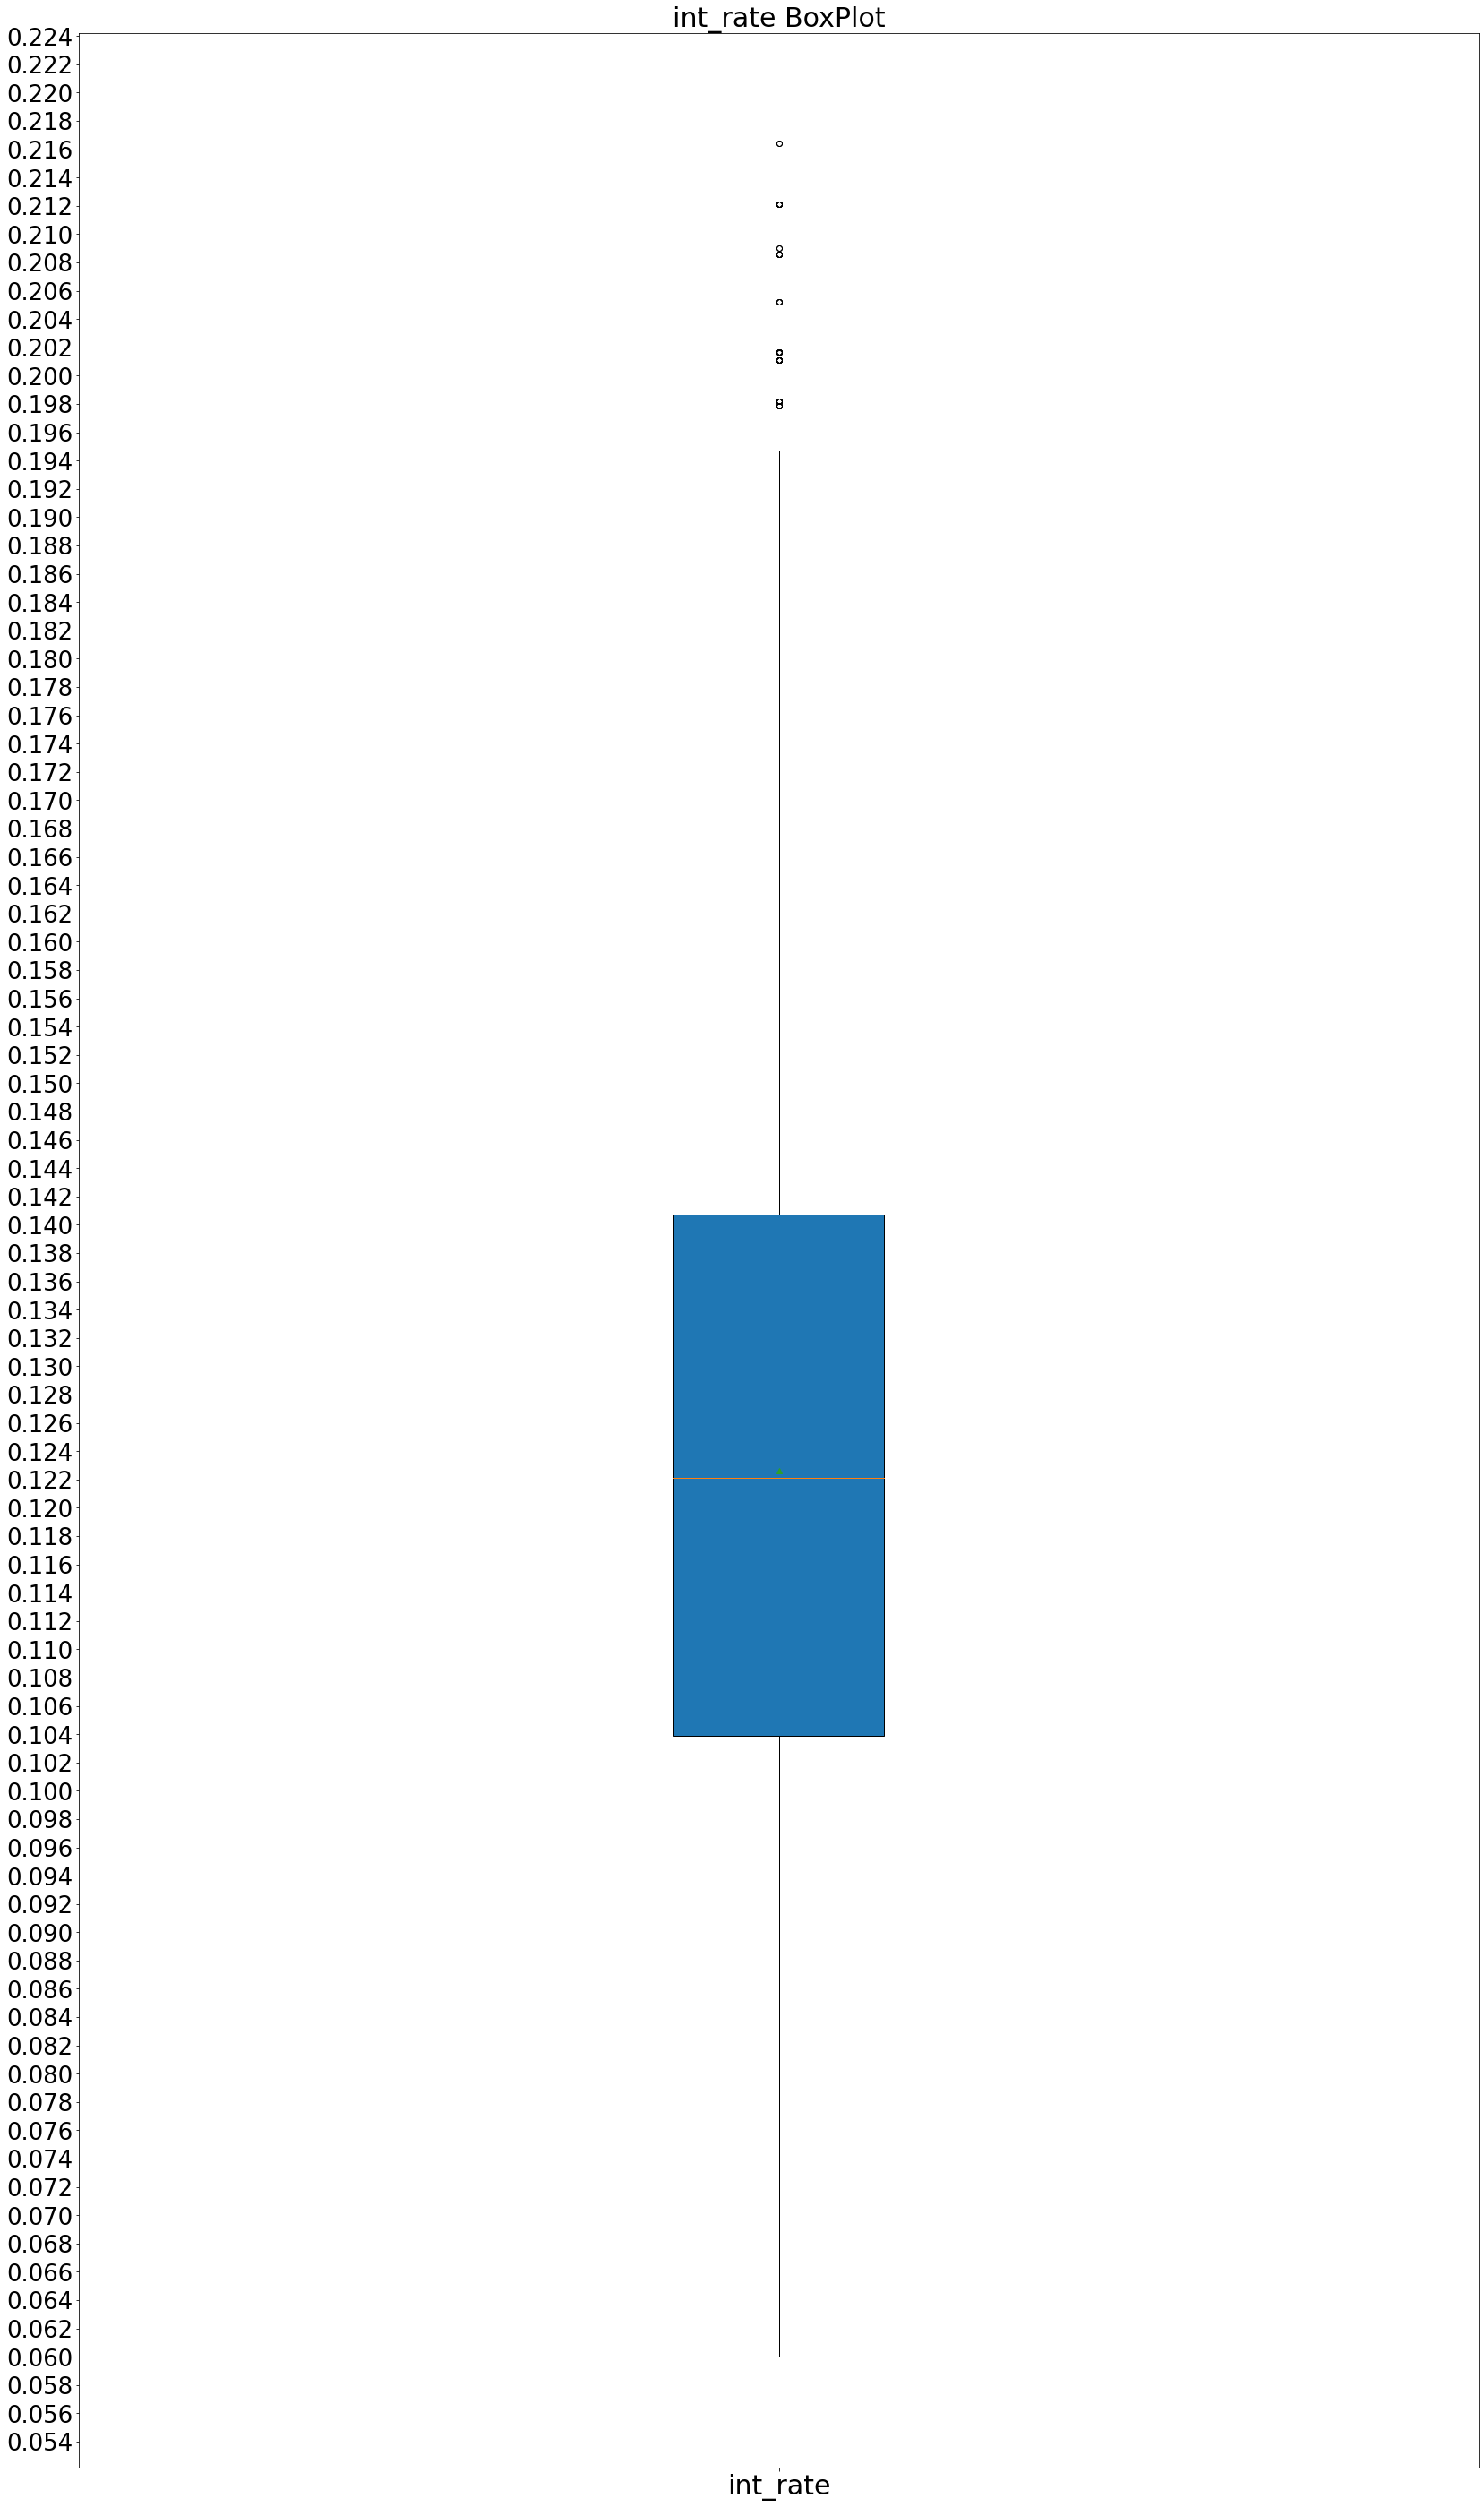

In [15]:
# 方法二：使用 Matplotlib 自带的 boxplot函数 来画 箱型图

# plt.rcParams["font.serif"] = ['SimHei']
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(28,50))
plt.title("int_rate BoxPlot", fontsize=30)
y_ticks = np.arange(0.05, 0.26, 0.002)
plt.xticks(fontsize=30)
plt.yticks(y_ticks, fontsize=26)

# 现在需要导入数据
data_boxplot = data_file["int_rate"]
plt.boxplot([data_boxplot,], labels = ["int_rate",], patch_artist=True, showmeans=True, boxprops={'color': 'black'} )    
plt.show()

---
**练习**
$\textsf{TODO - 1.4:}$
+ 请根据上边给出和引用的箱型图的评价标准，简单评价一下上图的数据模型的特征，并得出你的结论；
---

**练习 1.4 作答区域**
<br>
<br>
<br>
<br>

### 1.3 数据集的数据特征分析

对数据质量进行描述之后，现就是需要通过绘制图表、计算某些特征量的手段进行对应的数据分析；

分布分析可以清楚地知道数据在不同区间的分布特征以及相关分布类型，对于定量数据，要想了解数据的相关特征： 对称和非对称、发现特大和特小值可疑值等，可以做出相关的频率分布表，绘制频率分布直方图等办法；

定性数据通过： 饼图和条形图进行直观地显示分布情况；

#### 1.3.1 分布分析 - 定量数据

对于定量数据的相关进行数据分析：

+ 求极差
+ 决定组距和组数
+ 决定分点
+ 列出频率分布表 并绘制对应的直方图

要求：
+ 组宽最好相等；
+ 各组要有相应的数据包含在内；

<br>

**极差**

计算方式： 列中最大值和最小值相减最后得出的值；

<br>

**分组**

计算方式：

$$组数=\frac{极差}{组距}=组数$$


In [16]:
# 我们通过上边的相关信息，先计算出每一个分组的极差
range_value = data_file["int_rate"].max() - data_file["int_rate"].min()
range_value

0.1564

In [17]:
# 我们设定对应的组距： 0.02
range_value / 0.02

7.82

In [18]:
data_file["int_rate"].min()

0.06

In [19]:
data_file["int_rate"].max()

0.2164

In [20]:
# 即对应的组距分布：
range_list = ["[0.06,0.08)","[0.08,0.10)","[0.10,0.12)","[0.12,0.14)","[0.14,0.16)","[0.16,0.18)","[0.18,0.20)","[0.20,0.22)"]

In [21]:
# 参考 pandas 的 API： https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# 了解 cut 的相关用法
bins = [0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.20,0.22]
# 进行一次深拷贝  - 如果你不清楚请了解深拷贝的用法
data_file_copy = data_file.copy()
data_file_copy["int_rate_range"] = pd.cut(data_file["int_rate"], bins, labels=range_list)
data_file_copy["int_rate_range"]

0       [0.10,0.12)
1       [0.10,0.12)
2       [0.12,0.14)
3       [0.10,0.12)
4       [0.14,0.16)
           ...     
9573    [0.14,0.16)
9574    [0.12,0.14)
9575    [0.10,0.12)
9576    [0.14,0.16)
9577    [0.12,0.14)
Name: int_rate_range, Length: 9578, dtype: category
Categories (8, object): ['[0.06,0.08)' < '[0.08,0.10)' < '[0.10,0.12)' < '[0.12,0.14)' < '[0.14,0.16)' < '[0.16,0.18)' < '[0.18,0.20)' < '[0.20,0.22)']

In [22]:
# 获得了相关数据之后，我们需要对相关的 DataFrame 进行聚合
data_file_copy.groupby(by=["int_rate_range"])["int_rate"].apply(print)

5       0.0788
13      0.0714
20      0.0800
23      0.0788
26      0.0743
         ...  
9113    0.0768
9407    0.0774
9526    0.0788
9545    0.0788
9561    0.0788
Name: [0.06,0.08), Length: 786, dtype: float64
12      0.0859
14      0.0863
17      0.0894
21      0.0863
25      0.0901
         ...  
9369    0.0894
9387    0.0859
9461    0.0894
9465    0.0894
9516    0.0988
Name: [0.08,0.10), Length: 1391, dtype: float64
0       0.1189
1       0.1071
3       0.1008
7       0.1114
8       0.1134
         ...  
9534    0.1136
9541    0.1025
9557    0.1025
9563    0.1099
9575    0.1071
Name: [0.10,0.12), Length: 2172, dtype: float64
2       0.1357
9       0.1221
10      0.1347
11      0.1324
16      0.1317
         ...  
9562    0.1348
9564    0.1385
9567    0.1311
9574    0.1253
9577    0.1392
Name: [0.12,0.14), Length: 2814, dtype: float64
4       0.1426
6       0.1496
19      0.1513
54      0.1596
73      0.1501
         ...  
9569    0.1426
9571    0.1568
9572    0.1565
9573    0.1461

int_rate_range
[0.06,0.08)    None
[0.08,0.10)    None
[0.10,0.12)    None
[0.12,0.14)    None
[0.14,0.16)    None
[0.16,0.18)    None
[0.18,0.20)    None
[0.20,0.22)    None
Name: int_rate, dtype: object

In [23]:
aggResult = data_file_copy.groupby(by=["int_rate_range"])["int_rate"].agg([('int_rate',np.size)])
aggResult

,int_rate
int_rate_range,
"[0.06,0.08)",786.0
"[0.08,0.10)",1391.0
"[0.10,0.12)",2172.0
"[0.12,0.14)",2814.0
"[0.14,0.16)",1711.0
"[0.16,0.18)",492.0
"[0.18,0.20)",167.0
"[0.20,0.22)",37.0


In [24]:
# 求出对应的频率
aggResult_freq = round(aggResult/aggResult.sum()*1000,)
aggResult_freq

,int_rate
int_rate_range,
"[0.06,0.08)",82.0
"[0.08,0.10)",145.0
"[0.10,0.12)",227.0
"[0.12,0.14)",294.0
"[0.14,0.16)",179.0
"[0.16,0.18)",51.0
"[0.18,0.20)",17.0
"[0.20,0.22)",4.0


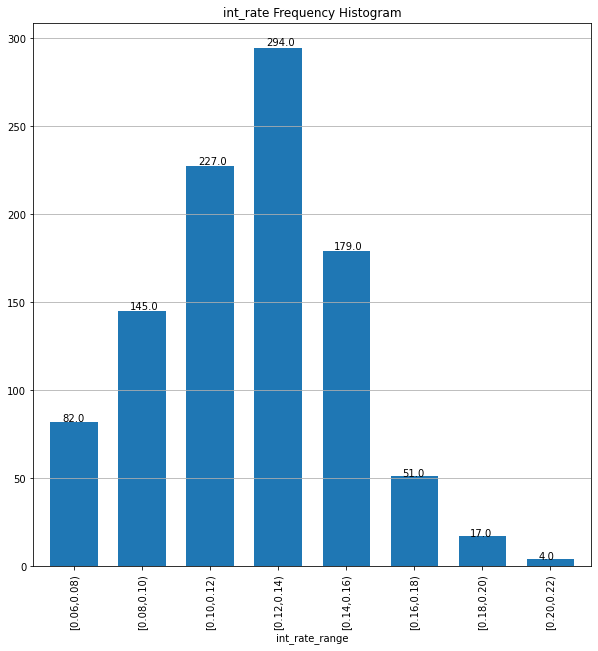

In [25]:
# 开始绘图
# 请查询相关API
plt.figure(figsize=(10,10))
plt.title("int_rate Frequency Histogram")
ax = aggResult_freq["int_rate"].plot(kind='bar', width=0.7, fontsize=10)
plt.grid(axis='y')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.17, p.get_height() * 1.005))
plt.show()

#### 1.3.2 分布分析 - 定性数据

所谓定性数据即非数值数据的相关数据，在本教程中，定性数据指的是 `policy` 这一列的数据，即借款的原因；

常用的定性数据的分布分析：

+ 根据分类的类型来进行分组；
+ 采用饼图和条形图的相关形式来描述数据的相关特征

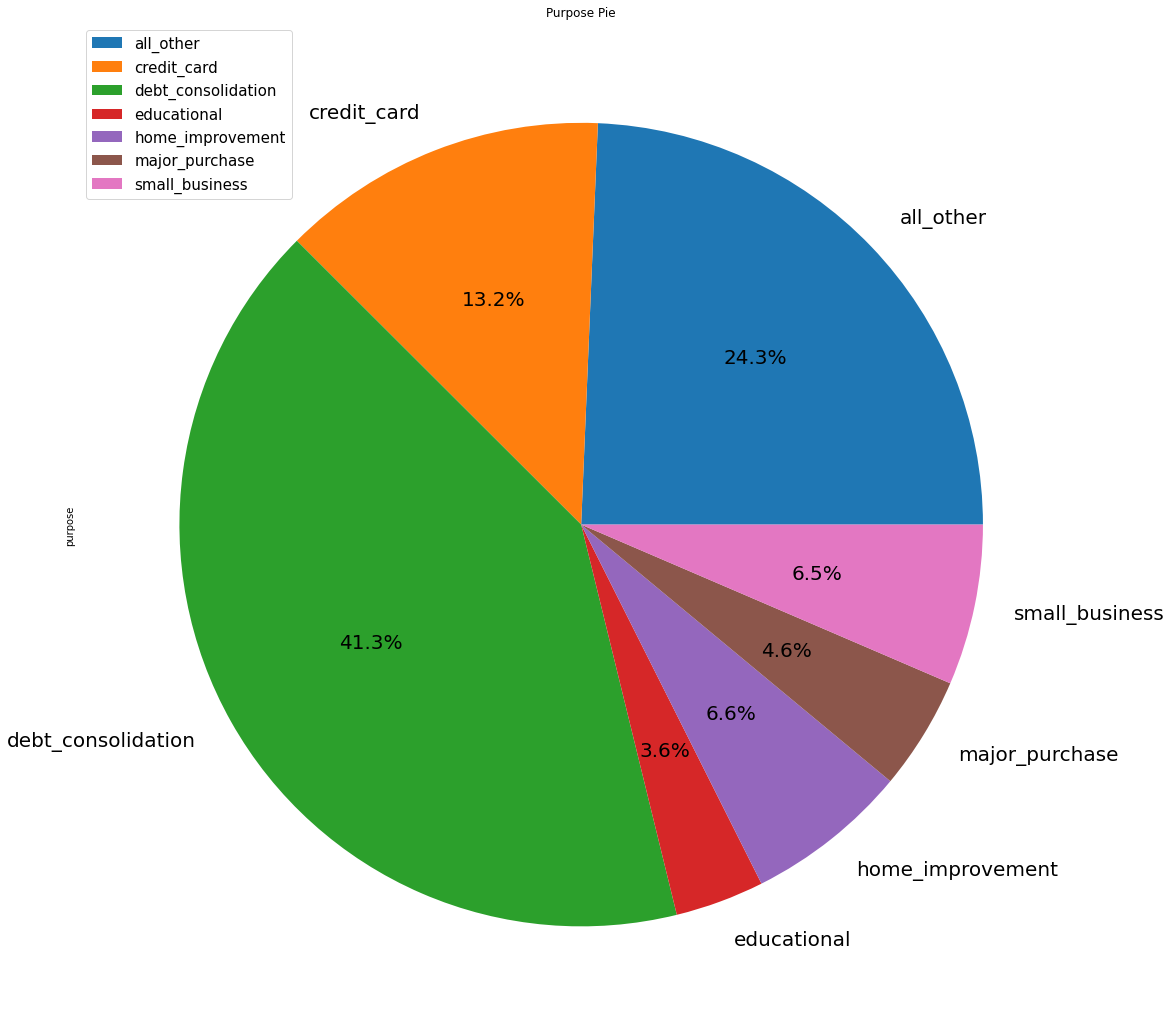

In [26]:
# 在这里我们使用 - purpose 的相关数据来进行相关的挥着饼形图
# 使用 data_file_copy 

df_pie = data_file_copy.groupby(by=["purpose"])["purpose"].agg([("purpose", np.size)])
labels = data_file["purpose"].unique().tolist()

df_pie.plot.pie(y="purpose", figsize=(18, 25), fontsize=20, autopct='%1.1f%%')
plt.title("Purpose Pie")
plt.legend(fontsize=15)
plt.show()

#### 1.3.3 对比分析

数据的对比分析指的是将星湖联系的数据进行比较，在数据的数值上展示和说明研究对象规模大小、水平高低以及速度的快慢，即相同数据标度进行比较；

对比分析的相关数据分析适用于指标间的横纵向比较、跨时间维度上相同数据内容的比较；

对比的意义在于： 通过不同维度上的比较来发现数据的相关变化趋势以及从趋势发现相关的特征，从而得出相关的结论；


##### 1.使用绝对数进行相关比较

绝对数：

在很多书中的定义是：某现象在特定时间和范围内的总体情况，是求和计算，虽然合计数在数据分析中是非常常用的一个指标，但是在实际中，绝对数可能不一定代表整体的相关情况，有可能是通过某些对应的数学计算步骤进行比较的；

##### 2. 相对数比较

相对数：

两个指标的比值，也就是两个绝对数的比值，根据对应指标进行比值计算的，用于反映数据集中某种客观现象之间数量联系程度的指标；

相对数的方法：

+ 结构相对数：在数据集内部分数值与全部数值进行比对求得比重，用于描述事物的相关属性的重要程度；比如：产品的良莠率、消费者在电商平台不同种类的消费情况占比；

+ 比例相对数：同一总体内不同部分的数值进行对比，表明相关的比例关系：性别比例、时间相对数；

+ 比较相对数：在同一个时间中性质相同的指标数值进行对比，用于说明 同类现象在不同空间条件下的数量对比关系；

+ 动态相对数：同一现象在不同时期的指标数值进行对比，用于说明相关的发展方向和变化速度；


在这里，就不进行相关数据分析实战了；

#### 1.3.4 统计量分析

用于统计的相关指标对数据急性统计描述，主要从： 集中趋势 和 离中趋势 两个方面进行分析；

集中趋势：

+ 容易受到影响的相关数值：中位值、平均数；

离中趋势：

+ 个体离开平均值的度量，使用最为广泛的是：标准差（方差）、四分位间距


##### 集中趋势度量

均值： 所有数据的平均数，非常简单的相关概念，但是均值容易受到极值的影响；

$$
\begin{equation} 
mean(x) = \overline{x} = \frac{\sum x_i}{n}
\end{equation}
$$
<br>

加权平均值：给每一个属性的数值增加一个系数；

$$
\begin{equation}
mean(x)=\overline{x}=\frac{\sum{w_ix_i}}{\sum w_i}=\frac{w_1x_1+w_2x_2+\cdots+w_ix_i}{w_1+w_2+\cdots+w_n}
\end{equation}
$$
<br>

中位数：将数据集中的数值按照从大到小的顺序进行排列，位于中间的那个数据，小于和大于中位数的数据个数相等；

<br>

众数：数据集中出现最频繁的值。众数一般用于离散型变量而非连续性变量；



##### 离中趋势度量

极差： 最大值 - 最小值， 对极端的数据比较敏感；

<br>

标准差： 反应数据的偏离程度 - $s$；

<br>

变异系数： 反应标准差相对于均值的离中趋势,这个数值越大表明均值离；

$$
\begin{equation}
CV=\frac{s}{\overline x}\times100%
\qquad
s: 标准差
\qquad
\overline{x}: 均值
\end{equation}
$$

<br>

四分位数间距 - 重点：

四分位数包括：上四分位和下四分位。 将所有的数值由小到大排列并分成4等份，处于第一个分割点位置的数值是下四分位数，处于第二个分割点位置 - 中间点位置是中位数，处于第三个分割点位置的数值是上四分位数。

四分位数间距是指：上四分位数 $Q_U$ 与 下四分位数 $Q_L$ 之差 (75% - 25% = 50%) 其数值刚好是全部观察值的一般。 其值越大，说明数据的变异程度越大，反正说明变异程度越小；


In [27]:
data_file_intrate_describe = data_file["int_rate"].describe()

In [28]:
# 现在我们用上边 int_rate 数据进行演示
# 求均值
data_file["int_rate"].mean()

0.12264006055543834

In [29]:
# 求标准差
data_file["int_rate"].std()

0.026846987213382724

In [30]:
# 求中位数
data_file["int_rate"].median()

0.1221

In [31]:
# 求变异系数
data_file_intrate_describe.loc['co-var'] = data_file["int_rate"].std() / data_file["int_rate"].mean() 

In [32]:
# 求四分位间距
data_file_intrate_describe.loc["range-interquartile"] = data_file_intrate_describe.loc["75%"] - data_file_intrate_describe.loc["25%"]

In [33]:
data_file_intrate_describe

count                  9578.000000
mean                      0.122640
std                       0.026847
min                       0.060000
25%                       0.103900
50%                       0.122100
75%                       0.140700
max                       0.216400
co-var                    0.218909
range-interquartile       0.036800
Name: int_rate, dtype: float64

---
**练习**
$\textsf{TODO - 1.5: [较难]}$
+ 请编写代码，新建一个变量：`data_file_describe` 来存储 `data_file` 的所有信息：
    + 新建： `co-var` 用来存储 离散系数计算值 <br>
    + 新建： `range-interquartile` 用来存储 四分位间距 计算值 <br>
+ 结果请遵循下边的回显

---

In [34]:
# 练习 TODO 1.5



#### 1.3.5 周期性分析

周期性分析指的是相关数据的某个变量是否随着时间的变化从而呈现出来的某种周期性变化趋势。

时间尺度有：

+ 年度周期性趋势
+ 季节性周期行趋势
+ 月度性周期趋势
+ 周度性周期趋势
+ 小时性周期趋势

即通过不同的时间跨度进行相关的数据特征分析：变化趋势、集中趋势等；


In [35]:
# 导入一个新的数据集 isp.csv 用于反应网络流量的时序变化特征

# 改变一下列名方便进行运算
column_name = ["Time", "Data_Collected"]
try:
    data_network = pd.read_csv("../../issue_Documents/data/network_data/isp.csv", header=0, names=column_name)
except FileNotFoundError:
    data_network = pd.read_csv("../issue_Documents/data/network_data/isp.csv", header=0, names=column_name)

# 更改列属性 - 将 str 类型转变成 np.float64
data_network["Data_Collected"].astype(np.float64)

# 格式化时间 - pandas提供了 to_datetime 函数来转换
data_network["Time"] = pd.to_datetime(data_network["Time"], format="%d/%m/%Y %H:%M")
data_network["Time"].head()

0   2004-11-19 09:30:00
1   2004-11-19 09:35:00
2   2004-11-19 09:40:00
3   2004-11-19 09:45:00
4   2004-11-19 09:50:00
Name: Time, dtype: datetime64[ns]

In [36]:
# 打印出数据的相关信息 我们可以看到从上边的信息得出来相关的数据特征
data_network.describe(datetime_is_numeric=True, include="all")

,Time,Data_Collected
count,19888,19888.000000
mean,2004-12-23 22:07:30,3866.935463
min,2004-11-19 09:30:00,1060.272426
25%,2004-12-06 15:48:45,2364.415558
50%,2004-12-23 22:07:30,3493.927588
75%,2005-01-10 04:26:15,4888.720499
max,2005-01-27 10:45:00,10670.687300
std,NaN,1852.915979


In [37]:
# 格式化时间之后，我们可以通过相关时间筛选出对应时间的相关数据
# 我们可以看到可以快速选择对应的日期
label_time = datetime.datetime.strptime('20041231', '%Y%m%d')
data_network[data_network["Time"] <= label_time].head(20)

,Time,Data_Collected
0,2004-11-19 09:30:00,4838.665376
1,2004-11-19 09:35:00,4845.176609
2,2004-11-19 09:40:00,5157.995660
3,2004-11-19 09:45:00,5637.875537
4,2004-11-19 09:50:00,5520.689840
5,2004-11-19 09:55:00,5626.337455
6,2004-11-19 10:00:00,5350.546016
7,2004-11-19 10:05:00,5356.983409
8,2004-11-19 10:10:00,5385.813812
9,2004-11-19 10:15:00,5403.905805


In [38]:
# 或者使用其他的办法来筛选数据 这里演示了筛选
data_network[data_network["Time"].dt.month == 11].head(20)

,Time,Data_Collected
0,2004-11-19 09:30:00,4838.665376
1,2004-11-19 09:35:00,4845.176609
2,2004-11-19 09:40:00,5157.995660
3,2004-11-19 09:45:00,5637.875537
4,2004-11-19 09:50:00,5520.689840
5,2004-11-19 09:55:00,5626.337455
6,2004-11-19 10:00:00,5350.546016
7,2004-11-19 10:05:00,5356.983409
8,2004-11-19 10:10:00,5385.813812
9,2004-11-19 10:15:00,5403.905805


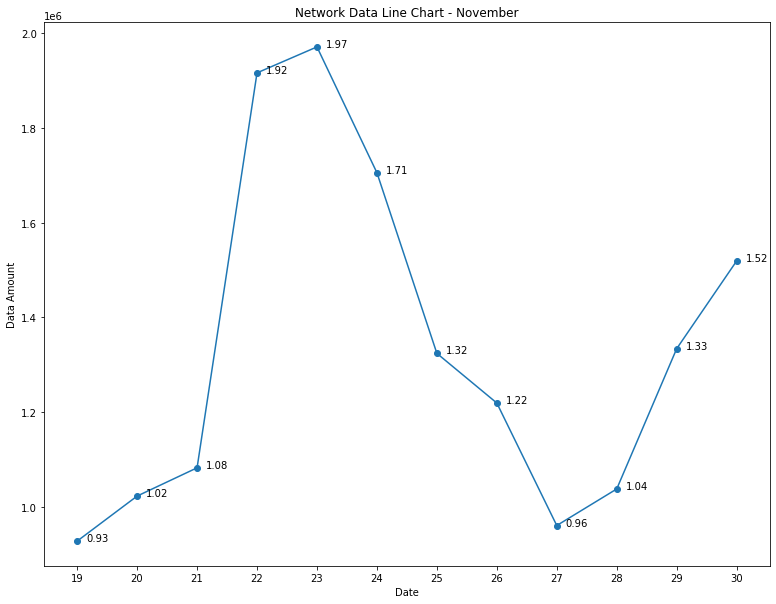

Time
19    9.283493e+05
20    1.023302e+06
21    1.082870e+06
22    1.915823e+06
23    1.970559e+06
24    1.705206e+06
25    1.324271e+06
26    1.219534e+06
27    9.611872e+05
28    1.038268e+06
29    1.334121e+06
30    1.519077e+06
Name: Data_Collected, dtype: float64

In [39]:
# 在这里我们需要聚合一下 11月份每天的相关信息，然后使用折线图画出来

data_Nov = list()
temp_df = data_network[data_network["Time"].dt.month == 11]

# 现在我们需要对数据进行聚合 - 在 Pandas 中 使用 Groupby 函数
# 如果你对这个用法不了解，请查询对应 API 以及对应的教程
temp_Series = temp_df.groupby(by=[temp_df.Time.dt.day])["Data_Collected"].agg("sum")

# 开始绘图
plt.figure(figsize=(13,10))
plt.title("Network Data Line Chart - November")
plt.plot(temp_Series.index, temp_Series.values, marker='o')
plt.xlabel("Date")
plt.ylabel("Data Amount")
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
for key,value in temp_Series.iteritems():
    plt.text(key+0.15, value+0.002, round(value/10e+05,2), fontsize=10)
plt.show()

# 从下图我们可以看出网络流量在 11月份的变化图
# 打印一下相关数据方便对比
temp_Series

#### 1.3.6 贡献度分析

贡献度分析又称帕累托分析(Pareto Analysis，也称柏拉图分析)。 广泛运用的统计学分析方法。同样的投入放在不同的地方会产生不同的收益。

帕累托分析法: 被称为 二八原则，即 80% 的工作/任务可以通过20%的工作来完成，在质量的改善和优化当中，大部分问题(80%) 是由几个关键的原因（20%）造成的；

参考链接：

+ [高级项目管理师专用，Pareto（帕累托）图制作的七大步骤](https://zhuanlan.zhihu.com/p/26839558)
+ [【python科研绘图】绘制帕累托图(Pareto)步骤解析，并封装后直接调用](https://blog.csdn.net/lys_828/article/details/113746366)


#### 1.3.7 相关性分析

##### 1.直接绘制散点图

判断两个变量是否具有线性相关关系最直观的方法是： 绘制相关散点图；

参考图片链接： https://pic3.zhimg.com/80/v2-841f2f672b0616e5b22b7e8cfe824b46_1440w.jpg

参考链接: [深入探讨散点图系列](https://zhuanlan.zhihu.com/p/39525392)

相关关系散点图如下：

![散点图](https://pic3.zhimg.com/80/v2-841f2f672b0616e5b22b7e8cfe824b46_1440w.jpg)


##### 2.绘制散点图矩阵
    
需要同时考虑多个变量的相关关系，使用散点图矩阵来同时绘制各变量间的散点图，从而发现多个变量之间的主要相关性，在多元回归分析额当中

散点矩阵示意图：


参考链接：

+ [Python 用 pandas 绘制散点图矩阵](https://www.cnblogs.com/shanger/p/13021657.html)
+ [Exploring and Visualizing Earnings Based on College Majors](https://rstudio-pubs-static.s3.amazonaws.com/544686_776dcb4c16cc402db33543be821b00b1.html)
+ [Python基于pandas绘制散点图矩阵代码实例](https://www.jb51.net/article/188027.htm)


![1](https://img.jbzj.com/file_images/article/202006/2020060410551226.png)

<br>

##### 3. 计算相关系数

更加准确地描述变量之间的线性相关度，可以通过**相关系数**的计算进行相关分析；

在二元变量的相关分析过程中，比较重要的： Pearson 相关系数、Spearman 相关系数、判定系数；

<br>

**1.Pearson 秩相关系数**

在了解 Pearson 相关系数之前，必须理解协方差(Covariance)的相关概念，也是用于反映两个随机变量相关程度的指标，计算公式如下：

$$
\begin{equation}
cov(X,Y)=\frac{\sum_n^{i=1}{(X_i-\overline{X})(Y_i-\overline{Y})}}{n-1}
\end{equation}
$$

从上边的公式知道：

+ 如果一个变量随着一个变量同时增大或者增小，协方差的数值就是**正值**；
+ 如果一个变量与另一个变量的变化趋势相反，协方差的数值就是**负值**；

<br>

Pearson 系数用于分析两个连续性变量之间的关系，其线性相关系数要求连续变量的取值需要服从正态分布，计算公式如下：

$$
\begin{equation}
\rho_{X,Y} = corr(X,Y) = \frac{cov(X,Y)}{\sigma_X\sigma_Y} =\frac{\frac{\sum_{i=1}^n{(X_i-\overline{X})(Y_i-\overline{Y})}}{n-1}}{\sqrt{\frac{\sum_{i=1}^n(X_i-\overline{X})^2}{n-1}}\sqrt{\frac{\sum_{i=1}^n(Y_i-\overline{Y})^2}{n-1}}}
= \frac{\sum_{i=1}^n{(X_i-\overline{X})(Y_i-\overline{Y})}}{\sqrt{\sum_{i=1}^n(X_i-\overline{X})^2\sum_{i=1}^n(Y_i-\overline{Y})^2}}
\end{equation}
$$

对于这个公式的理解：

相关系数： $\rho_{X,Y}$ 的数值分析遵循：

$$
\left\{
             \begin{array}{**lr**}
             \rho_{X,Y}>0 为正相关关系, \rho_{X,Y}<0 为负相关关系, &  \\  
             |\rho_(X,Y)|=0,表示不存在线性关系 & \\ 
             |\rho_(X,Y)|=1,表示完全线性相关关系 & \\    
             \end{array}
\right.
$$

对于不同程度的线性相关：

$$
\left\{
             \begin{array}{**lr**}
             |\rho_{X,Y}| \leq 0.3 \quad 表示及其弱线性相关或不存在线性相关 &  \\  
             0.3 < |\rho_(X,Y)| \leq 0.5 \quad 为低度线性相关 & \\ 
             0.5 < |\rho_(X,Y)| \leq 0.8 \quad 为显度线性相关 & \\    
                 |\rho_(X,Y)| > 0.8 \quad 为高度线性相关 & \\
             \end{array}
\right.
$$

Pearson 秩相关系数的局限性：

+ 假设数据的分布是符合正态分布的；
+ 数据至少在逻辑范围内是等距的；


<br>

**2.Spearman 秩相关系数**

如果连续变量不服从正态分布（无参数或与分布无关），分类或等级变量之间的关联性可采用Spearman秩相关系数，也被称为**等级相关系数**；

定义的公式如下：

$$
\begin{equation}
r_s = 1 - \frac{6\sum_{i=1}^n{(R_i-Q_i)^2}}{n(n^2-1)}\\
\end{equation}
R_i 代表 x_i 的秩次，Q_i 代表 y_i 的秩次， R_i - Q_i 代表秩次差
$$

将数据集的相关数据进行排列，从小到大进行排列（或者从大到小）的顺序进行编秩，我们记 $x_i$ $y_i$ 为之前的顺序, $x_i^{'}$ $y_i^{'}$ 记为排序之后的秩次，即定义秩次差为：$d_i=x_i^{'}-y_i^{'}$

对于连续测量数据，更适合用 Pearson 相关系数进行分析；

判定系数：

判定系数 $r_s^2$ 的取值范围在 $0\leq r_s^2 \leq 1$，这个值越接近于1，则表明其相关性越强，这个值越接近于0，则说明两个变量之间没有关系；

参考链接：

+ [相关性检验--Spearman秩相关系数和皮尔森相关系数](https://www.cnblogs.com/zhangchaoyang/articles/2631907.html)





In [40]:
# 我们简单来进行相关系数在 pandas 中的相关操作
# 参考 API ： https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# 使用 Pearson 秩系数
data_file.corr(method="pearson",min_periods=1)

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
credit_policy,1.000000,-0.294089,0.058770,0.035752,-0.090901,0.348319,0.098730,-0.187518,-0.109876,-0.534757,-0.077141,-0.054501,-0.158119
int_rate,-0.294089,1.000000,0.276140,0.057119,0.220006,-0.714821,-0.124505,0.092527,0.463864,0.206677,0.156080,0.098394,0.159552
installment,0.058770,0.276140,1.000000,0.448523,0.050202,0.086039,0.183263,0.233625,0.079541,-0.008099,-0.004720,-0.032639,0.049955
log_annual_inc,0.035752,0.057119,0.448523,1.000000,-0.053434,0.113733,0.336077,0.372481,0.056112,0.028432,0.029409,0.016377,-0.033279
dti,-0.090901,0.220006,0.050202,-0.053434,1.000000,-0.241191,0.060231,0.188748,0.336578,0.031135,-0.022085,0.006102,0.037362
fico,0.348319,-0.714821,0.086039,0.113733,-0.241191,1.000000,0.263685,-0.015553,-0.541113,-0.187682,-0.216481,-0.147389,-0.149666
days_with_cr_line,0.098730,-0.124505,0.183263,0.336077,0.060231,0.263685,1.000000,0.229430,-0.024019,-0.042029,0.081707,0.071336,-0.028889
revol_bal,-0.187518,0.092527,0.233625,0.372481,0.188748,-0.015553,0.229430,1.000000,0.203002,0.023805,-0.033348,-0.031026,0.053699
revol_util,-0.109876,0.463864,0.079541,0.056112,0.336578,-0.541113,-0.024019,0.203002,1.000000,-0.011377,-0.042905,0.067375,0.082041
inq_last_6mths,-0.534757,0.206677,-0.008099,0.028432,0.031135,-0.187682,-0.042029,0.023805,-0.011377,1.000000,0.021183,0.073984,0.149954


In [41]:
# 使用 Spearman 秩系数
data_file.corr(method="spearman",min_periods=1)

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
credit_policy,1.000000,-0.287878,0.073698,0.030228,-0.080286,0.352399,0.113409,-0.009222,-0.108413,-0.431072,-0.057907,-0.048810,-0.158119
int_rate,-0.287878,1.000000,0.242914,0.042297,0.216114,-0.744986,-0.133651,0.148719,0.472061,0.178337,0.173175,0.094207,0.152725
installment,0.073698,0.242914,1.000000,0.431826,0.062547,0.085257,0.202542,0.351844,0.094253,-0.003791,-0.007897,-0.027581,0.040404
log_annual_inc,0.030228,0.042297,0.431826,1.000000,-0.059087,0.107281,0.399775,0.416840,0.054581,0.030083,0.030209,0.013187,-0.035382
dti,-0.080286,0.216114,0.062547,-0.059087,1.000000,-0.214496,0.073319,0.375950,0.332962,0.030362,-0.018642,0.009284,0.035899
fico,0.352399,-0.744986,0.085257,0.107281,-0.214496,1.000000,0.251221,-0.094562,-0.519832,-0.176155,-0.237364,-0.148011,-0.147920
days_with_cr_line,0.113409,-0.133651,0.202542,0.399775,0.073319,0.251221,1.000000,0.325609,-0.003214,-0.042789,0.095395,0.101220,-0.024862
revol_bal,-0.009222,0.148719,0.351844,0.416840,0.375950,-0.094562,0.325609,1.000000,0.516591,-0.018197,-0.053698,-0.025586,0.020440
revol_util,-0.108413,0.472061,0.094253,0.054581,0.332962,-0.519832,-0.003214,0.516591,1.000000,-0.013029,-0.032031,0.072230,0.081395
inq_last_6mths,-0.431072,0.178337,-0.003791,0.030083,0.030362,-0.176155,-0.042789,-0.018197,-0.013029,1.000000,0.020471,0.057275,0.132034


In [42]:
# 下载 Scipy 到本机中
!conda install --yes --prefix {sys.prefix} scipy

Solving environment: done

# All requested packages already installed.



In [43]:
# 也可以指定两列属性进行相应的对比
data_file["int_rate"].corr(data_file["not_fully_paid"], method="spearman")

0.15272495978428804